In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/city_day.csv')
# df.head(n=2)

In [3]:
# preprocessing
def fill_with_mean(df, col_list):
    for col in col_list:
        df[col].fillna(df[col].mean(), inplace=True)
    return df
df = fill_with_mean(df, ['PM2.5', 'PM10', 'NO', 'NO2','NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'])

In [4]:
df['vehicle_pollutants'] = df['PM2.5'] + df['PM10'] + df['NO'] + df['NOx'] + df['NH3'] + df['CO']
df['industrial_pollutants'] = df['SO2'] + df['O3'] + df['Benzene'] + df['Toluene'] + df['Xylene']

In [5]:
old_df = df
df = df[['City', 'Date', 'vehicle_pollutants', 'industrial_pollutants']]
df.head(n=2)

,City,Date,vehicle_pollutants,industrial_pollutants
0,Ahmedabad,2015-01-01,228.051157,161.02
1,Ahmedabad,2015-01-02,227.461157,71.56


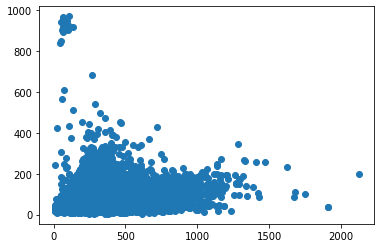

In [6]:
plt.scatter(df['vehicle_pollutants'], df['industrial_pollutants'])

In [7]:
scaler = MinMaxScaler()
df['industrial_pollutants'] = scaler.fit_transform(df['industrial_pollutants'].values.reshape(-1, 1)) 
df['vehicle_pollutants'] = scaler.fit_transform(df['vehicle_pollutants'].values.reshape(-1, 1)) 

C:\Users\hrish\AppData\Local\Temp/ipykernel_10248/2240338289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industrial_pollutants'] = scaler.fit_transform(df['industrial_pollutants'].values.reshape(-1, 1))
C:\Users\hrish\AppData\Local\Temp/ipykernel_10248/2240338289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_pollutants'] = scaler.fit_transform(df['vehicle_pollutants'].values.reshape(-1, 1))


In [8]:
k = KMeans(n_clusters=4)
k_predicted = k.fit_predict(df[['industrial_pollutants', 'vehicle_pollutants']])
df['cluster'] = k_predicted

C:\Users\hrish\AppData\Local\Temp/ipykernel_10248/1983988206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = k_predicted


In [9]:
df.head(n=2)

,City,Date,vehicle_pollutants,industrial_pollutants,cluster
0,Ahmedabad,2015-01-01,0.104416,0.162867,3
1,Ahmedabad,2015-01-02,0.104137,0.070464,0


In [10]:
centroids = k.cluster_centers_
c_x = [i[0] for i in centroids]
c_y = [i[1] for i in centroids]

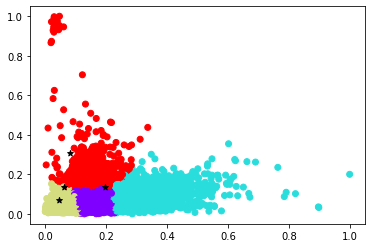

In [11]:
plt.scatter(df['vehicle_pollutants'], df['industrial_pollutants'], c=df['cluster'], cmap='rainbow')
plt.scatter(c_x, c_y, color='black', marker='*')